<a href="https://colab.research.google.com/github/VaibhavBhusawale/Fare-Prediction/blob/main/Mini_project_Fare_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset “trips.csv” contains the following fields:

key - a unique identifier for each trip

fare_amount - the cost of each trip in usd

pickup_datetime - date and time when the meter was engaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

– You need to analyse the data and create an efficient model that will estimate the fare prices accurately. 


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read the health insurance data set 
path = '/content/drive/MyDrive/Mini Project/trip.csv'

df = pd.read_csv(path)

In [7]:
df.head()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df.shape

(200000, 9)

In [9]:
df.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [10]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


**Hypothesis Generation**

1. Trip Distance : We know thw distance is important to calculate fare amount according to distance traveled.  If the distance to be traveled is more, then fare should be higher.
2. Time of travel : According to time we can decide fare like during peak traffic hours, the taxi fare may be higher or more charges on night trip
3. Day of travel : Fare amount may differ on weekday and weekends
4. Month of travel : Fare may differ on seasons and festival time 
5. Weather Condition : If it is Raining, snowing, there may be lower availability of cabs and hence higher fares.
6. Pickup and drop-off : Fare may be different based on the kind of neighborhood or pickup point is longer 
7. Availability of Taxi: If a particular location has a lot of cabs available, the fares may be lower.If cabs are lower then fare may be increase 
8. Vehicle type : Fare amount Depends on which type of vehicle is require like suv, Tuv or seats capacity or brand of vehicle etc.



We know the what type of data and features require for predicting fare and after that collecting data from server we have 'index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','passenger_count' these features

So lets go to predict best fare according to besed on all hypothesics testing to get best fare
berfore going to to prediction we should work on our dataset to understand the dataset  by using Data cleaning and Exploration 


#**Data Cleaning and Exploration**

Distribution of fare amount

In [11]:
df.columns

Index(['index', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [12]:
df =df[['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count']]

In [13]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                200000 non-null  object 
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [16]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                   Total Null Values  Percentage
key                                0         0.0
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [17]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#apply it to features

imputer.fit(df[['fare_amount','passenger_count']])
df[['fare_amount','passenger_count']] = imputer.transform(df[['fare_amount','passenger_count']])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                199999 non-null  object 
 1   fare_amount        199999 non-null  float64
 2   pickup_datetime    199999 non-null  object 
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  float64
dtypes: float64(6), object(2)
memory usage: 13.7+ MB


In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [20]:
df['Hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['date'] = df['pickup_datetime'].dt.day
df['day'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['Day of Week'] = df['pickup_datetime'].dt.dayofweek


In [21]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,minute,date,day,month,year,Day of Week
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1.0,19,52,7,3,5,2015,3
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1.0,20,4,17,4,7,2009,4
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,45,24,0,8,2009,0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3.0,8,22,26,4,6,2009,4
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5.0,17,47,28,3,8,2014,3


In [22]:
df.shape

(199999, 15)

In [23]:
df.drop(df[df['pickup_datetime'].isna()].index, inplace=True)

In [24]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [25]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

day                       7
year                      7
Day of Week               7
passenger_count           8
month                    12
Hour                     24
date                     31
minute                   60
fare_amount            1244
pickup_longitude      71065
dropoff_longitude     76894
pickup_latitude       83835
dropoff_latitude      90585
key                  199999
dtype: int64

In [26]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,minute,date,day,month,year,Day of Week
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,29.534848,15.704739,3.048435,6.281791,2011.742434,3.048435
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,17.335443,8.687377,1.946946,3.438933,1.856400,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,14.000000,8.000000,1.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,59.000000,31.000000,6.000000,12.000000,2015.000000,6.000000


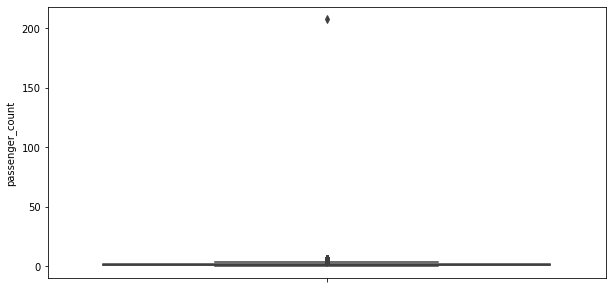

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['passenger_count'])

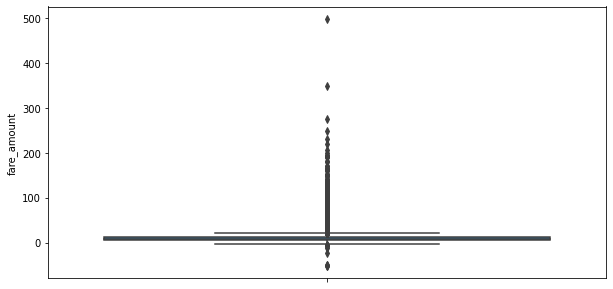

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df['fare_amount'])

In [29]:
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -0.5
Upper : 3.5


In [30]:
df['passenger_count'].sort_values(ascending=True).head(10)

89854     0.0
43510     0.0
21596     0.0
122964    0.0
35212     0.0
16209     0.0
101601    0.0
7321      0.0
63746     0.0
44645     0.0
Name: passenger_count, dtype: float64

In [31]:
df.drop(df[df['passenger_count'] > 4 ].index, inplace = True)
df.drop(df[df['passenger_count'] < 0 ].index, inplace = True)
df.drop(df[df['passenger_count'] == 0.12 ].index, inplace = True)
df.drop(df[df['passenger_count'].isna() ].index, inplace = True)

In [32]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -3.75
Upper : 22.25


In [33]:
df['fare_amount'].sort_values(ascending=True).head(10)

164056   -50.5
92063    -23.7
151681   -10.9
104080    -7.3
139272    -6.9
148803    -5.7
190925    -5.5
63395     -5.0
179111    -3.5
157412    -3.5
Name: fare_amount, dtype: float64

In [34]:
df.drop(df[df['fare_amount'] > 150 ].index, inplace = True)
df.drop(df[df['fare_amount'] == 0 ].index, inplace = True)
df.drop(df[df['fare_amount'] < 0 ].index, inplace = True)
df.drop(df[df['fare_amount'].isna() ].index, inplace = True)

In [35]:
df['fare_amount'].sort_values(ascending=True).head(10)

21658     0.01
191228    0.01
149342    0.11
180962    2.50
94873     2.50
32378     2.50
79205     2.50
159971    2.50
165621    2.50
198554    2.50
Name: fare_amount, dtype: float64

In [36]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Hour,minute,date,day,month,year,Day of Week
count,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000,181678.000000
mean,11.330844,-72.526859,39.940636,-72.530457,39.929866,1.326380,13.487406,29.530218,15.702413,3.045751,6.277386,2011.738736,3.045751
std,9.646479,11.410992,7.814976,13.336782,6.796156,0.683075,6.517458,17.340050,8.694496,1.946744,3.438828,1.856595,1.946744
min,0.010000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992054,40.734814,-73.991413,40.733835,1.000000,9.000000,14.000000,8.000000,1.000000,3.000000,2010.000000,1.000000
50%,8.500000,-73.981820,40.752554,-73.980091,40.753017,1.000000,14.000000,30.000000,16.000000,3.000000,6.000000,2012.000000,3.000000
75%,12.500000,-73.967168,40.767157,-73.963673,40.767992,1.000000,19.000000,45.000000,23.000000,5.000000,9.000000,2013.000000,5.000000
max,150.000000,57.418457,1644.421482,1153.572603,872.697628,4.000000,23.000000,59.000000,31.000000,6.000000,12.000000,2015.000000,6.000000


3. Pickup and dropoff latitude should be (-90 to 90 )

In [37]:
df.drop(df[df['pickup_latitude'] < -90].index, inplace=True)
df.drop(df[df['dropoff_latitude'] > 90].index, inplace=True)


4. Pickup and dropoff longtitude should be ( -180 to 180 )

In [38]:

df.drop(df[df['pickup_longitude'] > 180].index, inplace=True)
df.drop(df[df['pickup_longitude'] < -180].index, inplace=True)


In [39]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Hour                 0
minute               0
date                 0
day                  0
month                0
year                 0
Day of Week          0
dtype: int64

Now, for EDA. The following are my considerations -

Does the number of passengers affect the fare?

Does the date and time of pickup affect the fare?

Does the day of the week affect the fare?

Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following -

1. year
2. month
3. date
4. hour
5. minute
5. day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

**Distance**

This uses the **haversine** formula to calculate the great-circle distance between two points – that is, the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points (ignoring any hills they fly over, of course!).

Haversine
formula:	a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)

c = 2 ⋅ atan2( √a, √(1−a) )

d = R ⋅ c

where	φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
note that angles need to be in radians to pass to trig functions!

In [40]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [41]:
df['distance'] = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [42]:
df.drop(['key','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1, inplace=True)

In [43]:
df.head()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,Day of Week,distance
0,7.5,1.0,19,52,7,3,5,2015,3,1.683323
1,7.7,1.0,20,4,17,4,7,2009,4,2.457590
2,12.9,1.0,21,45,24,0,8,2009,0,5.036377
3,5.3,3.0,8,22,26,4,6,2009,4,1.661683
5,4.9,1.0,2,27,12,5,2,2011,5,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


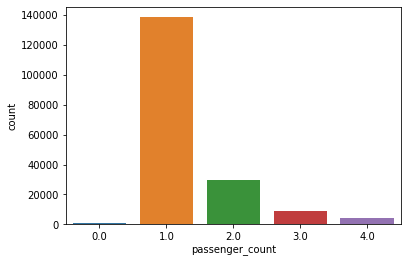

In [44]:
sns.countplot(df.passenger_count)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


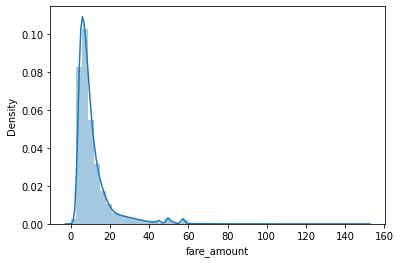

In [45]:
sns.distplot(df.fare_amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


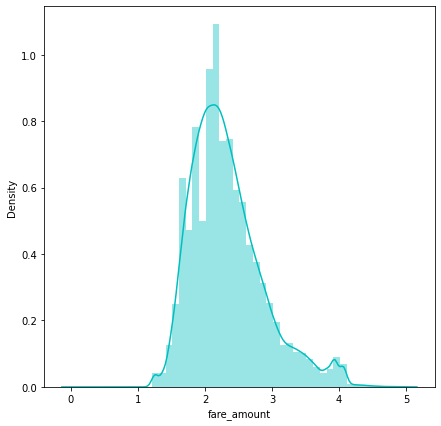

In [46]:
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['fare_amount']+1),color="c")

1. Does the number of passengers affect the fare?

Text(0, 0.5, 'Frequency')

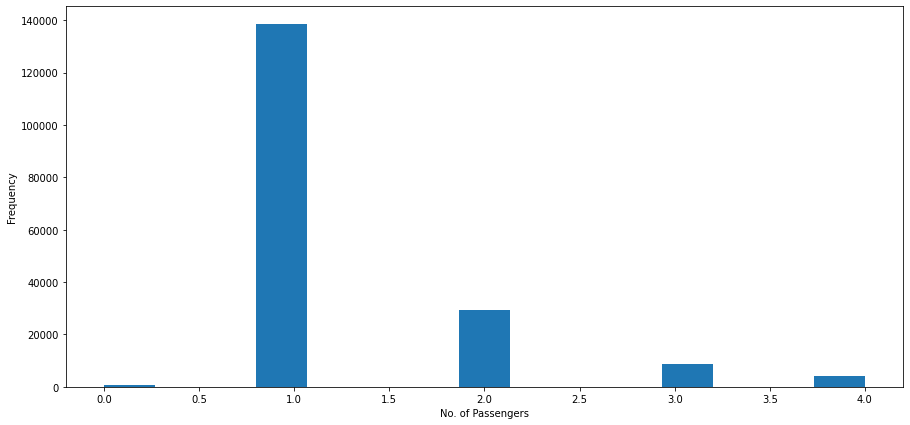

In [47]:
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

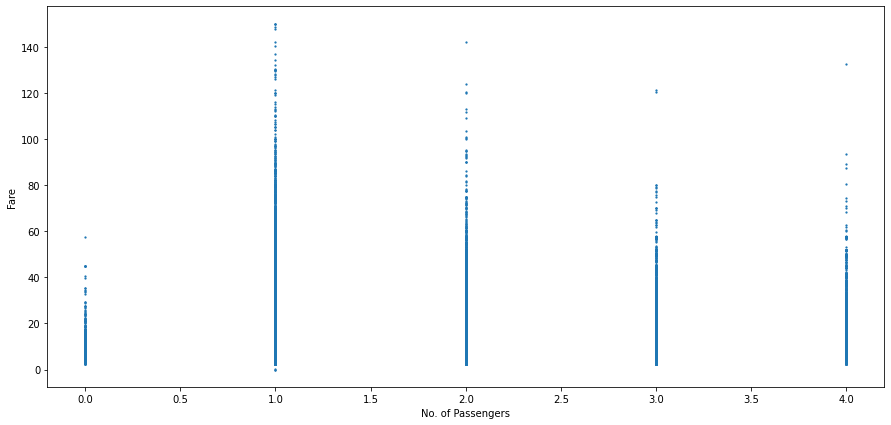

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

2. Does the date and time of pickup affect the fare?

Text(0, 0.5, 'Fare')

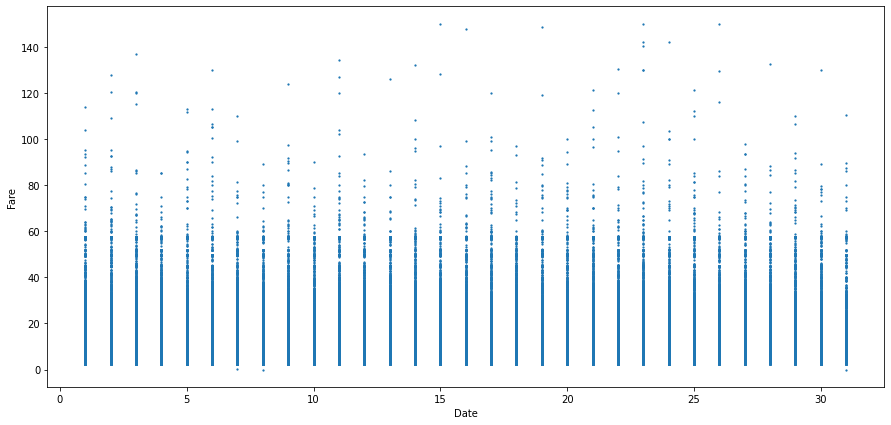

In [49]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['date'], y=df['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

Text(0, 0.5, 'Frequency')

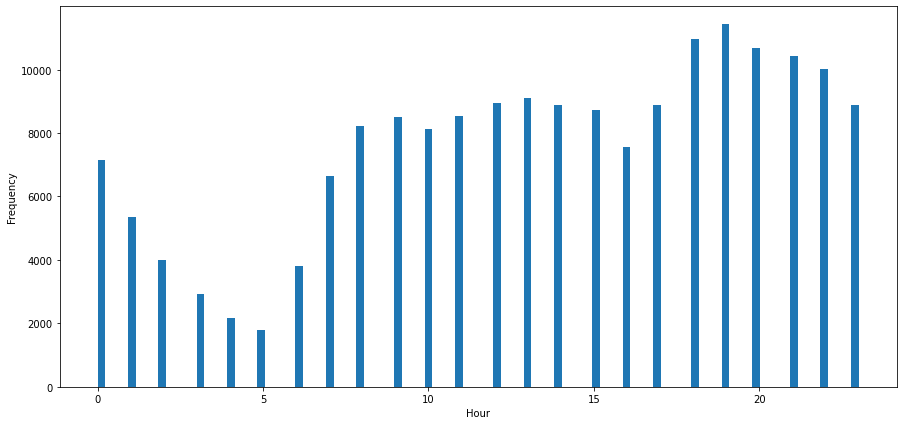

In [50]:
plt.figure(figsize=(15,7))
plt.hist(df['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

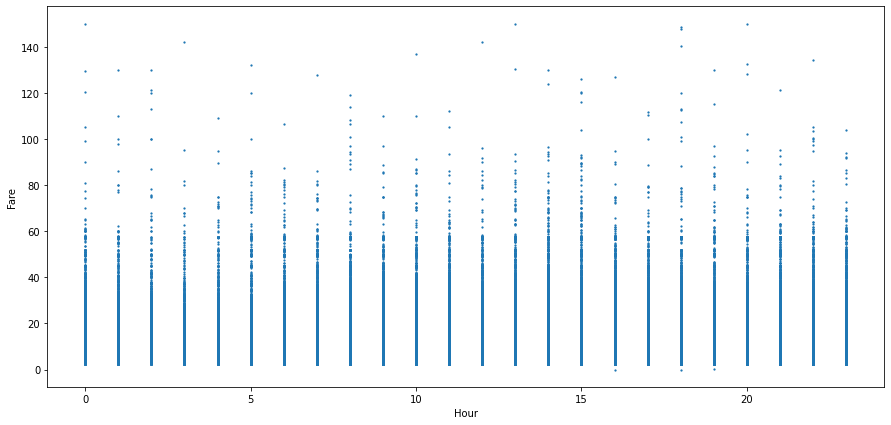

In [51]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['Hour'], y=df['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. 

Text(0, 0.5, 'Frequency')

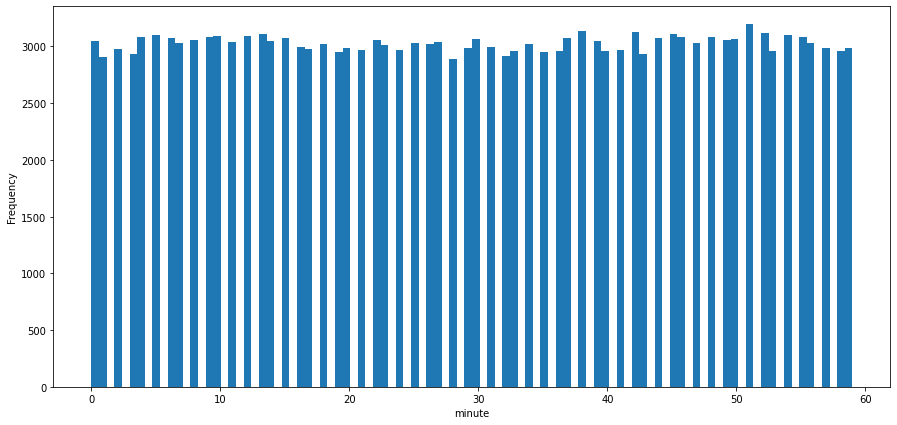

In [52]:
plt.figure(figsize=(15,7))
plt.hist(df['minute'], bins=100)
plt.xlabel('minute')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

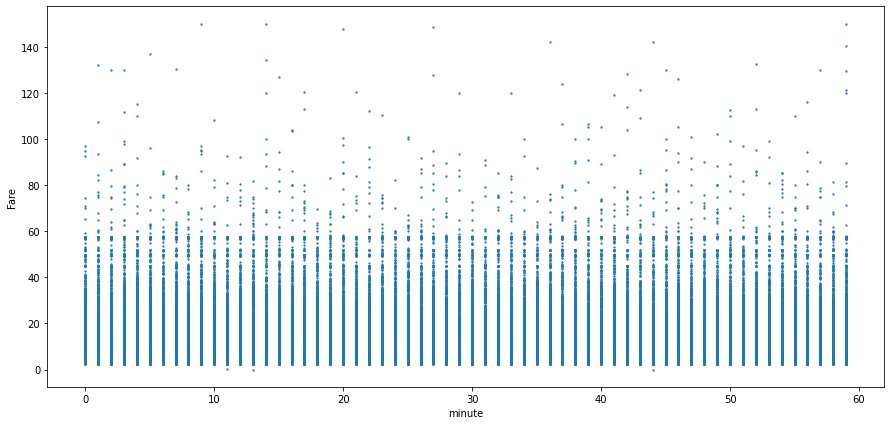

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['minute'], y=df['fare_amount'], s=1.5)
plt.xlabel('minute')
plt.ylabel('Fare')

3. Does the day of the week affect the fare?



Text(0, 0.5, 'Frequency')

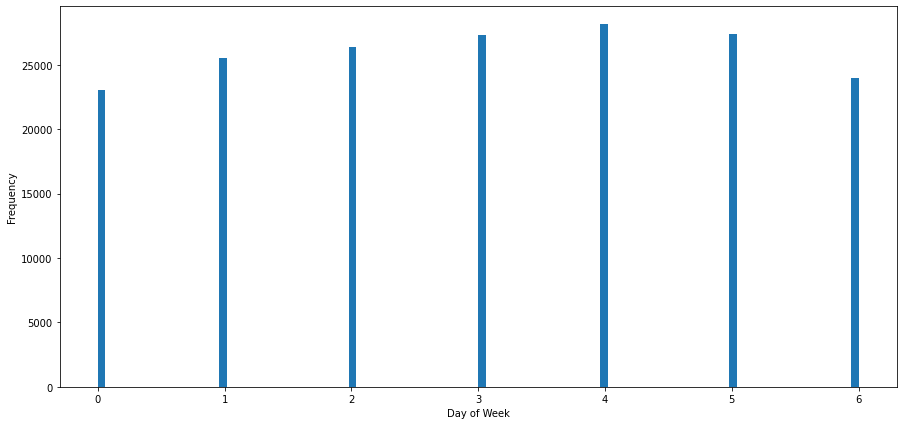

In [54]:
plt.figure(figsize=(15,7))
plt.hist(df['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

day of the week doesn't seem to have that much of an influence on the number of cab rides

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work

Text(0, 0.5, 'Frequency')

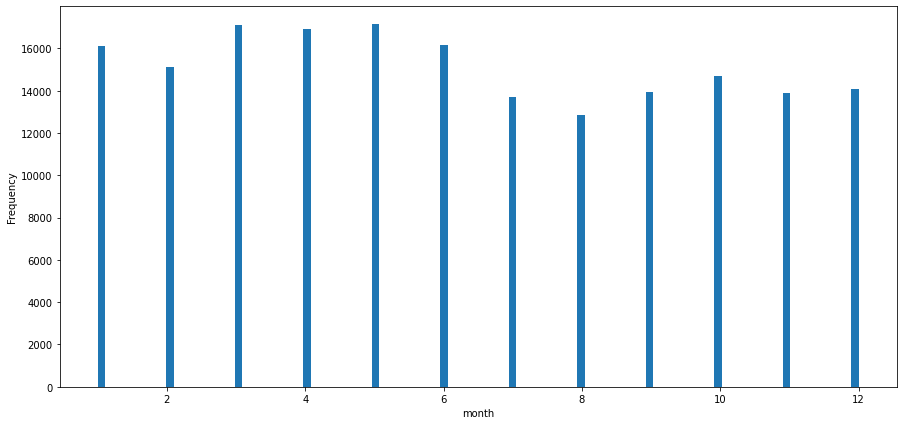

In [55]:
plt.figure(figsize=(15,7))
plt.hist(df['month'], bins=100)
plt.xlabel('month')
plt.ylabel('Frequency')

The highest frequency seen to Jan to Jun and after that dcreases may be rainy season or weather condition peopele doesen't want to go outdoor.

Text(0, 0.5, 'Fare')

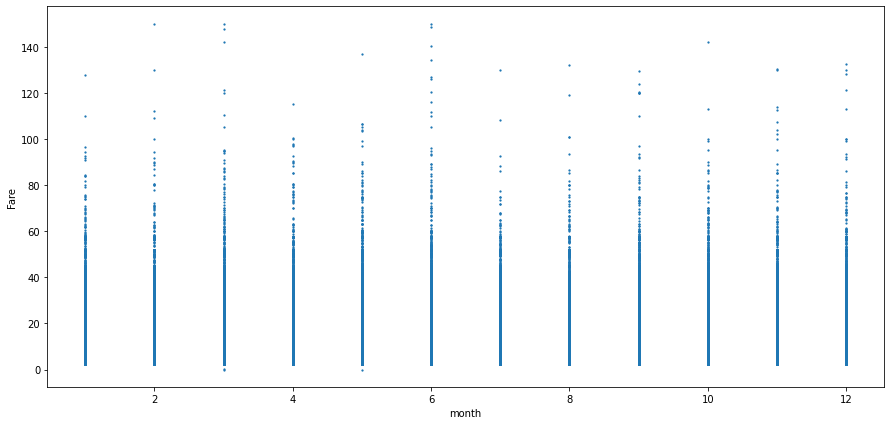

In [56]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['month'], y=df['fare_amount'], s=1.5)
plt.xlabel('month')
plt.ylabel('Fare')

4. Does the distance affect the fare?

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


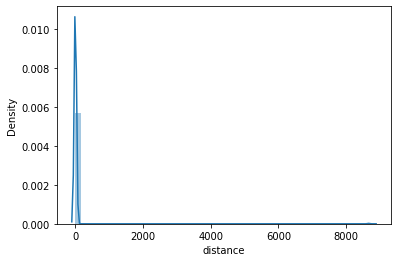

In [57]:
sns.distplot(df.distance)

In [58]:
df.describe()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,Day of Week,distance
count,181671.000000,181671.000000,181671.000000,181671.000000,181671.000000,181671.00000,181671.000000,181671.000000,181671.00000,181671.000000
mean,11.330772,1.326376,13.487508,29.530068,15.702413,3.04572,6.277353,2011.738770,3.04572,20.733471
std,9.646483,0.683057,6.517373,17.339954,8.694499,1.94676,3.438817,1.856613,1.94676,382.343358
min,0.010000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,2009.000000,0.00000,0.000000
25%,6.000000,1.000000,9.000000,14.000000,8.000000,1.00000,3.000000,2010.000000,1.00000,1.215414
50%,8.500000,1.000000,14.000000,30.000000,16.000000,3.00000,6.000000,2012.000000,3.00000,2.121053
75%,12.500000,1.000000,19.000000,45.000000,23.000000,5.00000,9.000000,2013.000000,5.00000,3.869592
max,150.000000,4.000000,23.000000,59.000000,31.000000,6.00000,12.000000,2015.000000,6.00000,8782.898606


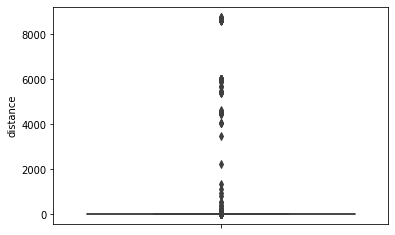

In [59]:
sns.boxplot(y=df['distance'])

In [60]:
df[(df['distance']==0)]

,fare_amount,passenger_count,Hour,minute,date,day,month,year,Day of Week,distance
5,4.9,1.0,2,27,12,5,2,2011,5,0.0
7,2.5,1.0,13,52,11,1,12,2012,1,0.0
11,8.5,1.0,22,15,23,0,5,2011,0,0.0
48,56.8,1.0,22,24,3,3,1,2013,3,0.0
65,6.0,1.0,19,27,5,0,5,2014,0,0.0
...,...,...,...,...,...,...,...,...,...,...
199724,7.5,1.0,11,25,11,4,10,2013,4,0.0
199880,6.5,1.0,6,45,22,5,2,2014,5,0.0
199883,12.5,2.0,17,39,10,0,9,2012,0,0.0
199917,4.5,1.0,22,17,24,0,6,2013,0,0.0


scenario_1  : distance =0 and fareamount not equal to 0

In [61]:
scenario_1= df.loc[(df['distance']==0) & (df['fare_amount']!=0)]

In [62]:
len(scenario_1)

5104

In [63]:
scenario_2= df.loc[(df['distance']!=0) & (df['fare_amount']!=0)]

In [64]:
len(scenario_2)

176567

In [65]:
scenario_3= df.loc[(df['distance']==0) & (df['fare_amount']==0)]

In [66]:
len(scenario_3)

0

In [67]:
df.head()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,Day of Week,distance
0,7.5,1.0,19,52,7,3,5,2015,3,1.683323
1,7.7,1.0,20,4,17,4,7,2009,4,2.457590
2,12.9,1.0,21,45,24,0,8,2009,0,5.036377
3,5.3,3.0,8,22,26,4,6,2009,4,1.661683
5,4.9,1.0,2,27,12,5,2,2011,5,0.000000


In [68]:
df.shape

(181671, 10)

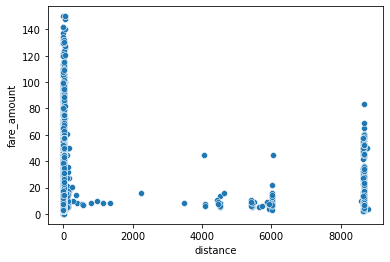

In [69]:
sns.scatterplot(x=df['distance'],y=df['fare_amount'])

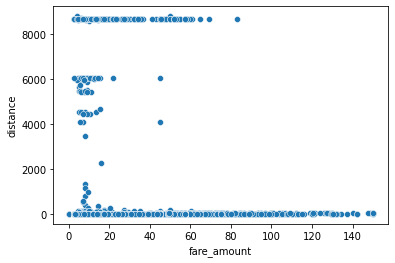

In [70]:
sns.scatterplot(x=df['fare_amount'],y=df['distance'])

Create a function for Z-score using the below formula

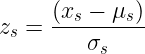

In [71]:
outliers =[]
def outliers_zscore(df):
    max_dev = 10
    mean = np.mean(df)
    std = np.std(df)
    for i in df:
        Z_score = (i-mean)/std
        if np.abs(Z_score)>max_dev:
            outliers.append(i)
    return outliers

In [72]:
z_score_outlier = outliers_zscore(df['distance'])

In [73]:
z_score_outlier

[8666.398011893705,
 8647.035598410284,
 8666.772408492829,
 6021.114288963912,
 5941.05980139621,
 8664.55672771194,
 8654.17691733738,
 8665.506686140774,
 6032.019622606144,
 4529.7811253543,
 8647.728768268604,
 8665.366348487581,
 8666.344428280681,
 8665.77421618131,
 8664.487974628988,
 8666.150464250506,
 5885.528611469774,
 8660.934207817352,
 8656.269062038931,
 8674.803956410682,
 8663.92360073002,
 8666.485077032652,
 8667.501608017361,
 8665.411981553198,
 8665.000403612288,
 8667.287756040836,
 8663.88274165427,
 8666.317736805837,
 8667.641308227623,
 8666.436931100674,
 8656.43945104091,
 5651.396519240892,
 8663.378289547192,
 8669.531629673844,
 8667.068195440754,
 8664.609751910566,
 8670.986537624896,
 8666.443832444893,
 4445.3824536070115,
 8667.460972843573,
 8666.824666500353,
 8666.309612611502,
 8666.400403003627,
 8666.512861496876,
 8666.996267653498,
 8662.361853557846,
 6030.6721051607465,
 8664.33179912851,
 8666.595223790797,
 8664.252236939961,
 8666.43

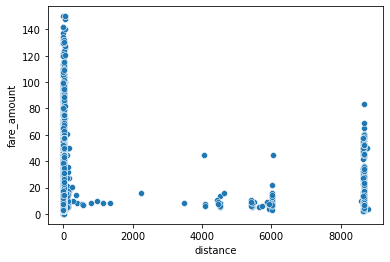

In [74]:
sns.scatterplot(x=df['distance'],y=df['fare_amount'])

In [75]:
quartile1,quartile3=np.percentile(df['distance'],[5,95])


In [76]:
print(quartile1,quartile3)

0.42794793611025417 10.102161489750475


In [77]:
interquartile_range = quartile3-quartile1
print(interquartile_range)


9.674213553640222


In [78]:
lower_bound = quartile1 -(1.5*interquartile_range)
upper_bound = quartile3 +(1.5*interquartile_range)

In [79]:
print(lower_bound,upper_bound)


-14.083372394350079 24.613481820210808


In [80]:
df.drop(df[df['distance'] >= 50].index, inplace=True)
df.drop(df[df['distance'] <= 0 ].index, inplace=True)

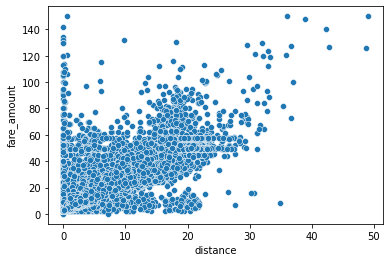

In [81]:
sns.scatterplot(x=df['distance'],y=df['fare_amount'])

In [82]:
df.head()

,fare_amount,passenger_count,Hour,minute,date,day,month,year,Day of Week,distance
0,7.5,1.0,19,52,7,3,5,2015,3,1.683323
1,7.7,1.0,20,4,17,4,7,2009,4,2.457590
2,12.9,1.0,21,45,24,0,8,2009,0,5.036377
3,5.3,3.0,8,22,26,4,6,2009,4,1.661683
8,9.7,1.0,9,32,17,4,2,2012,4,2.332711


In [83]:
df.columns

Index(['fare_amount', 'passenger_count', 'Hour', 'minute', 'date', 'day',
       'month', 'year', 'Day of Week', 'distance'],
      dtype='object')

#**Linear regression**

In [84]:
X=df.drop('fare_amount',axis=1)
y=df['fare_amount']

In [85]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
print(len(X_test) )
print(len(X_train))
print(len(y_test) )
print(len(y_train))

52837
123284
52837
123284


In [87]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.00341371, 0.01951769, 0.        , 0.        , 0.00172751,
       0.01448116, 0.4693409 , 0.00264466, 0.92700988])

In [88]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

distance           0.927010
year               0.469341
Hour               0.019518
month              0.014481
passenger_count    0.003414
Day of Week        0.002645
day                0.001728
minute             0.000000
date               0.000000
dtype: float64

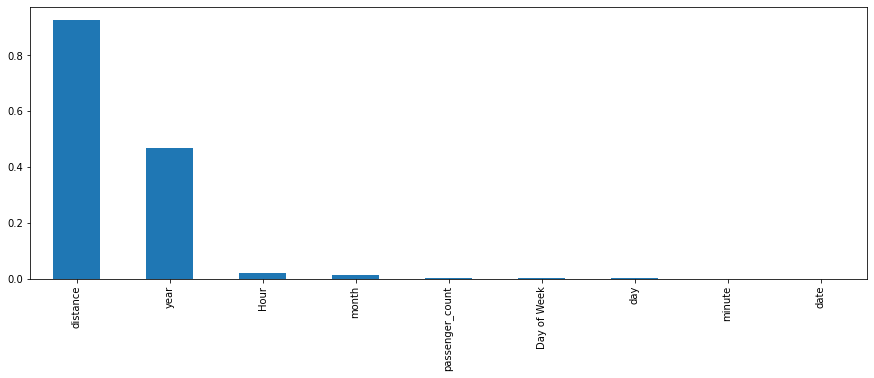

In [89]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [90]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [91]:
reg.score(X_train, y_train)

0.78562740555234

Desicion Tree

In [92]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [93]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    overlay=(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    plt.annotate(s=overlay,xy=(0,2500),size='x-large')

In [94]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [95]:
y_pred=regressor.predict(X_test)
y_pred

array([10.5,  7. ,  7.5, ...,  5.7,  8. , 18.5])

In [96]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [97]:
metrics.r2_score(y_test,y_pred)

0.5914164222394152

In [98]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

In [99]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    overlay=(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    plt.annotate(s=overlay,xy=(0,2500),size='x-large')

In [100]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

In [101]:
# Pipeline with baseline XGBoost
pipe = make_pipeline(StandardScaler(), XGBRegressor())

# Cross-validation
cv = cross_val_score(pipe, X_train, y_train, cv=10)
print('5-fold R2 scores:', cv)
print('Mean R2', np.mean(cv))

[15:53:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [102]:
# Pipeline with tuned XGBoost
pipe = make_pipeline(StandardScaler(), XGBRegressor(n_estimators=70, max_depth=10, eta=0.08,
                                                    subsample=0.8, reg_lambda=1.2))

# Cross-validation
cv = cross_val_score(pipe, X_train, y_train, cv=10)
print('5-fold R2 scores:', cv)
print('Mean R2', np.mean(cv))

[15:54:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [103]:
# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

[15:57:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.0, 150.0)

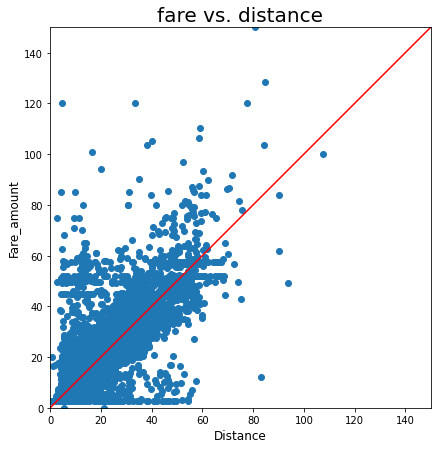

In [104]:
plt.figure(figsize=(7,7))

# 1:1 line
x = np.linspace(0,3500,10)
y = x

# Scatter plot predicted vs. actual
plt.scatter(y_pred, y_test)
plt.plot(x, y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Distance', size=12)
plt.ylabel('Fare_amount', size=12)
plt.title('fare vs. distance', size=20)
plt.xlim(0,150)
plt.ylim(0,150)

#**RandomForest Regression**

In [105]:
X=df.drop('fare_amount',axis=1)
y=df['fare_amount']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state = 42)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_estimators=250, criterion='mae')


In [115]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
# create regressor object
regressor = RandomForestRegressor(n_estimators = 250, criterion='squared_error')


In [116]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250)

In [117]:
predicts = regressor.predict(X_test)

In [118]:
regressor.score(X_train, y_train)

0.9739702342355852

In [119]:
y_test.head(20)

78909     10.0
20767      6.0
158568     7.5
15410      6.0
79128     13.5
97303      8.5
162892    12.0
127149     8.5
80736     11.7
110811     8.9
33255      6.5
20357     34.5
96716     45.0
82137      7.5
199593     7.3
176309     6.5
194801     5.3
194972     3.5
41149     10.5
120686    20.1
Name: fare_amount, dtype: float64

In [120]:
predicts[:20]

array([13.70456,  6.60028,  8.424  ,  6.852  , 15.352  ,  8.4568 ,
       10.67   ,  9.29924, 10.1672 ,  8.7856 ,  9.18   , 37.34188,
       47.82464,  6.528  ,  7.3904 ,  6.6064 ,  5.5872 ,  4.632  ,
        8.6548 , 27.62436])

# **Model Evaluation**

In [121]:
from sklearn.metrics import r2_score

score=r2_score(y_test,predicts)
score

0.7996765680819717

In [122]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, predicts))
print(RMSE)

4.267385761535002
